# Introduction to Computational Chemistry

# Setup

## Library import



In [1]:
# Data manipulation
import numpy as np
import scipy as sp
import pandas as pd
import xarray as xr

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set notebook environmental variables for Gaussian%env GAUSS_SCRDIR=/scrach-data/g16-scratch%env GAUSS_EXEDIR=/usr/bin/g16/bsd:/usr/bin/g16%env GAUSS_LEXEDIR=/usr/bin/g16/linda-exe%env GAUSS_ARCHDIR=/usr/bin/g16/arch%env GAUSS_BSDDIR=/usr/bin/g16/bsd%env GV_DIR=/usr/bin/gv%env G16BASIS=/usr/bin/g16/basis

# Data import

In [2]:
# File handling
from pathlib import Path
import shutil
import re

# Data manipulation
import numpy as np
import scipy as sp
import pandas as pd

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.despine()

from scipy.stats import linregress
import math

<Figure size 432x288 with 0 Axes>

## Problem 1

I created a list of basis functions, the number of basis functions in them, and the total energy calculated with that basis. 

In [3]:
def Ha_to_kJ(num):
    return 627.509 * num

In [5]:
## Fill in the values in the dictionary object below. 
data_dict = {'Basis set' : ['STO-3G', 'cc-pVDZ', 'cc-pVTZ', 'cc-pVQZ'],
             'Total energy (Ha)' : [ -0.454180,
                                     -0.495280,
                                     -0.496114,
                                     -0.496306],
             'Basis set size':    [1, 5, 14, 30]}
hf_data = pd.DataFrame(data=data_dict)
print("Table 1. Total Energy, Basis Sets and Basis Sizes using Hartree-Fock (HF) Theory")
hf_data

Table 1. Total Energy, Basis Sets and Basis Sizes using Hartree-Fock (HF) Theory


,Basis set,Total energy (Ha),Basis set size
0,STO-3G,-0.454180,1
1,cc-pVDZ,-0.495280,5
2,cc-pVTZ,-0.496114,14
3,cc-pVQZ,-0.496306,30


Figure 1. Basis Set Size vs. Total Energy (Ha) using HF Theory


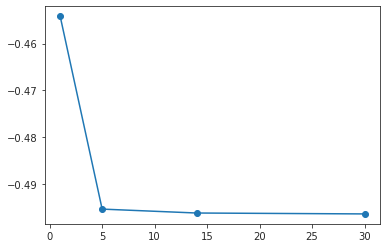

In [6]:
# hf_data.plot(x='Basis set size', y='Total energy (Ha)', kind="scatter")
plt.plot(hf_data["Basis set size"], hf_data["Total energy (Ha)"], "o-")
print("Figure 1. Basis Set Size vs. Total Energy (Ha) using HF Theory")

After running the file `performance.sh`, I imported the summary data from the results using the read_csv() function.

In [7]:
## Import an external file 
method_comp = pd.read_csv('Problem_1/performance.dat', delim_whitespace=True)
print("Table 2. Performance Data using HF Theory")
method_comp 

Table 2. Performance Data using HF Theory


,Method,basis-set,#BS,E[Ha]
0,SVWN,STO-3G,1,-0.454180
1,SVWN,cc-pVDZ,5,-0.495280
2,SVWN,cc-pVTZ,14,-0.496114
3,SVWN,cc-pVQZ,30,-0.496306
4,PBEPBE,STO-3G,1,-0.464375
5,PBEPBE,cc-pVDZ,5,-0.498627
6,PBEPBE,cc-pVTZ,14,-0.499619
7,PBEPBE,cc-pVQZ,30,-0.499854
8,PBE1PBE,STO-3G,1,-0.466508
9,PBE1PBE,cc-pVDZ,5,-0.500289


Finally, to plot all of the methods against each other, I grouped the data.

Figure 2. Basis Set Size vs. Total Energy (Ha) using 3 Basis Functions


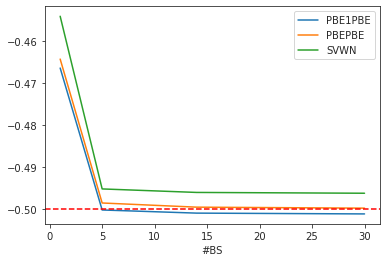

In [8]:
# Create a set of axes to reuse for each plot
ax = plt.gca()

# Plot data from each 'Method' group on the `ax` object
for key, grp in method_comp.groupby(['Method']):
    grp.plot(x='#BS',y='E[Ha]', label=key, ax=ax)
plt.legend(loc='best')   

plt.axhline(y = -0.5, color = 'r', linestyle = '--')

print("Figure 2. Basis Set Size vs. Total Energy (Ha) using 3 Basis Functions")
plt.show()


## Problem 2

The file named `dist_E.dat`is filled with bond distances and energies.

In [9]:
# Import data from `dist_E.dat` using the same method as in Problem 1
dist_E = pd.read_csv('Problem_2/dist_E.dat', delim_whitespace=True)

print("Table 3. Bond Distance and Calculated Energy using 6-31G(d, p) Function of HF Thoery")
dist_E

Table 3. Bond Distance and Calculated Energy using 6-31G(d, p) Function of HF Thoery


,dist,E[Ha]
0,0.70,-100.232677
1,0.80,-100.310543
2,0.85,-100.326214
3,0.87,-100.329639
4,0.89,-100.331762
5,0.90,-100.332390
6,0.91,-100.332757
7,0.93,-100.332781
8,0.95,-100.331965
9,1.00,-100.326984


Figure 3. Bond Distance vs. Total Energy using 6-31G(d, p) Function of HF Thoery


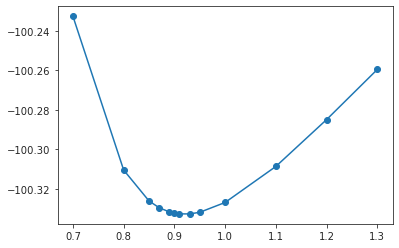

In [10]:
#Plot the bond distance vs. total energy and output the minimum distance and energy
plt.plot(dist_E['dist'], dist_E['E[Ha]'], '-o')
print("Figure 3. Bond Distance vs. Total Energy using 6-31G(d, p) Function of HF Thoery")

In [11]:
# Calculate \Delta H_{at} for the molecule, print out the result

Flu_HFmethod_Energy = -99.3649568696
Hyd_HFmethod_Energy = -0.498232909202
Hydflu_HFmethod_Energy = -100.332781

HFmethod_delta_H_at = Hydflu_HFmethod_Energy - Hyd_HFmethod_Energy - Flu_HFmethod_Energy
print("The experimental value of ∆𝐻_at equals", round(Ha_to_kJ(HFmethod_delta_H_at), 2), "kJ/mol." )


The experimental value of ∆𝐻_at equals -294.67 kJ/mol.


Figure 4. Bond Distance vs. Total Energy using 6-31G(d, p) Function of PBE1PBE Thoery


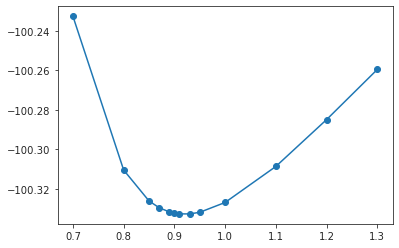

In [12]:
#PBE1PBE Method
a = [-100.232676840, -100.310543365, -100.326213510, -100.329639112, -100.331761577, 
     -100.332390250, -100.332757500, -100.332780645, -100.331964886, -100.326984302, 
     -100.308752238, -100.285033017, -100.259646166]

plt.plot(dist_E['dist'], a, '-o')
print("Figure 4. Bond Distance vs. Total Energy using 6-31G(d, p) Function of PBE1PBE Thoery")

In [13]:
Flu_PBEmethod_Energy = -99.6246249210
Hyd_PBEmethod_Energy = -0.499108855176
Hydflu_PBEmethod_Energy = -100.332780645

PBEmethod_delta_H_at = Hydflu_PBEmethod_Energy - (Hyd_PBEmethod_Energy + Flu_PBEmethod_Energy)
print("The experimental value of ∆𝐻_at equals", round(Ha_to_kJ(PBEmethod_delta_H_at), 2), "kJ/mol." )

The experimental value of ∆𝐻_at equals -131.18 kJ/mol.


I grab data on dipoles from the original files by using the `grep` program. 

In [14]:
!grep Dipole Problem_2/HF*/dist_*/*.log -A1
# dipoles = !grep Dipole Problem_2/HF*/dist_*/*.log -A1 | grep Tot | awk '{print $9}'
# print(dipoles)
#!grep Dipole dist*/*.log -A1 | grep Tot | awk '{print $9}'

Problem_2/HF_method/dist_0.70/input.log: Dipole moment (field-independent basis, Debye):
Problem_2/HF_method/dist_0.70/input.log-    X=              0.0000    Y=              0.0000    Z=             -1.5897  Tot=              1.5897
--
Problem_2/HF_method/dist_0.70/input.log: 10985\RMSD=8.962e-10\Dipole=0.,0.,0.6254379\Quadrupole=-0.3252787,-0.3
Problem_2/HF_method/dist_0.70/input.log- 252787,0.6505575,0.,0.,0.\PG=C*V [C*(H1F1)]\\@
--
Problem_2/HF_method/dist_0.80/input.log: Dipole moment (field-independent basis, Debye):
Problem_2/HF_method/dist_0.80/input.log-    X=              0.0000    Y=              0.0000    Z=             -1.7672  Tot=              1.7672
--
Problem_2/HF_method/dist_0.80/input.log: 45705\RMSD=1.059e-09\Dipole=0.,0.,0.695262\Quadrupole=-0.4027602,-0.40
Problem_2/HF_method/dist_0.80/input.log- 27602,0.8055204,0.,0.,0.\PG=C*V [C*(H1F1)]\\@
--
Problem_2/HF_method/dist_0.85/input.log: Dipole moment (field-independent basis, Debye):
Problem_2/HF_method/dist_0.85/in

Figure 5. HF Method Dipole Moment vs. Bond Length


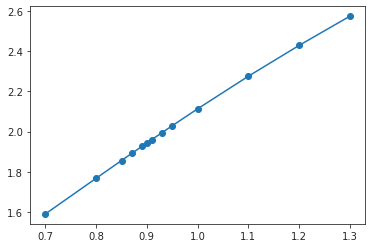

In [15]:
# I input dipole information, then plot the bond distance vs. the dipole moment. 

list_name = [1.5897, 1.7672, 1.8556, 1.8907, 1.9256, 1.9430, 1.9603, 
             1.9947, 2.0289, 2.1131, 2.2753, 2.4288, 2.5742]

plt.plot(dist_E['dist'], list_name, "-o")
print("Figure 5. HF Method Dipole Moment vs. Bond Length")

Figure 6. PBE1PBE Method Dipole Moment vs. Bond Length


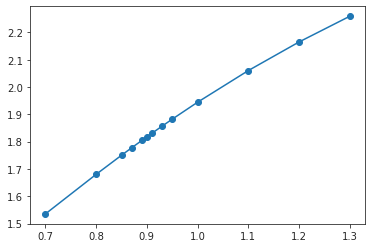

In [16]:
list_name1 = [1.5351, 1.6800, 1.7499, 1.7772, 1.8040, 1.8173, 1.8305, 
              1.8565, 1.8821, 1.9442, 2.0601, 2.1648, 2.2590]

plt.plot(dist_E['dist'], list_name1, "-o")
print("Figure 6. PBE1PBE Method Dipole Moment vs. Bond Length")

## Problem 3

After I ran the planar H<sub>3</sub>O<sup>+</sup> molecule, I visualized the results.  

In [17]:
# OpenChemistry has a viewing module
import cclib # Note, cclib translates to units of eV when it parses input. 
import json
import openchemistry as oc

I started by importing and parsing the data using `cclib`. I set the location of the logfile for the calculation on the planar molecule below. The next cell converted the `cclib` import to the cJSON format, a standard being promoted by the [OpenChemistry Project][openchem-home]. 

The variable `logfile` should be set to the name and location of the `input.log` file from your pyramidal calculation. In the next cell, the variable `cjsonfile` should be set to the same folder and a new file with the extension `.cjson`. For example, if your file is in `Problem_3/Pyramidal/input.log`, you might set `cjsonfile` to be `Problem_3/Pyramidal/any-name.cjson`. 

[openchem-home]: https://www.openchemistry.org
[oc-py]: https://github.com/OpenChemistry/openchemistrypy

In [18]:
# Import and parse Gaussian data with cclib 
logfile = "Problem_3/Planar/input.log"
planar_log = cclib.io.ccread(logfile)

# Display some information about our log file
for key, value in planar_log.metadata.items():
    print(f'{key:18}: {value}')

package           : Gaussian
methods           : ['HF', 'HF', 'HF', 'HF']
success           : True
legacy_package_version: 16revisionB.01
package_version   : 2016+B.01
platform          : ES64L
basis_set         : 6-31G(d,p)
cpu_time          : [datetime.timedelta(seconds=4, microseconds=300000), datetime.timedelta(seconds=2, microseconds=600000)]
wall_time         : [datetime.timedelta(seconds=2, microseconds=200000), datetime.timedelta(seconds=1, microseconds=300000)]


In [19]:
# Convert Gaussian data to cJSON output that OpenChemistry can understand
cjsonfile= 'planar.cjson'
cclib.io.ccwrite(planar_log,outputtype='cjson',outputdest=cjsonfile)

with open(cjsonfile) as f:
    planar_cjson = json.load(f)
    
planar_mol = oc.load(planar_cjson)

The next cell outputs the total energy of the molecule (in eV, `cclib` automatically does the conversion of that field). 


Below the printed line with the molecule energy is a visual representation of the molecule. This can be rotated and zoomed with the mouse. Note that the bonds aren't all properly represented,  but this is fixed in the following cell. 

In [20]:
print(f"The total energy of the molecule is {planar_mol.properties.data()['energy']['total']} eV.")
planar_mol.structure.show()

The total energy of the molecule is -2076.4708636977834 eV.


<jupyterlab_cjson.CJSON object>

The following two cells do a bit of editing on the incoming data to show the "bonds" (remember, bonds don't really exist, they're just a way to represent the overlap of orbitals when atoms get close enough to each other). The second cell rearranges the imported vibrational data so that we can view the vibrations with the visualizer. 

In [21]:
## For visualization purposes, create bonds between oxygen and all other atoms
# atoms are numbered consecutively from 0 in the order they're listed in the 
# input file. We want bonds from the first atom (oxygen, number "0") to each
# other atom. 
planar_mol.structure.data()['bonds'] = {'connections': {'index': [0, 1,
                                                                0, 2,
                                                                0, 3]}}
# Set all bonds to order 1 (single bonds)
planar_mol.structure.data()['bonds']['order'] = [1, 1, 1]

In [22]:
## Need to edit the vibrational data that comes in from cclib
# Need to rename 'displacement' to 'eigenVectors' so that OpenChemistry can 
# recognize it. Also need to reshape the array (group by vibrational mode).
planar_mol.vibrations.data()['displacement'] = \
    np.array(
        planar_mol.vibrations.data()['displacement']).reshape(
            len(planar_mol.vibrations.data()['frequencies'])
            , -1
        ).tolist()
planar_mol.vibrations.data()['eigenVectors'] = planar_mol.vibrations.data().pop('displacement')

# Change 'intensities' to contain _only_ IR data, throw out Raman information
planar_mol.vibrations.data()['intensities'] = planar_mol.vibrations.data()['intensities'].pop('IR')

# Add enumerated list of 'modes' for OC to reference
planar_mol.vibrations.data()['modes'] = list(range(0, (len(planar_mol.vibrations.data()['intensities']))))

In the next three cells, we will get to view the information about the molecule. The first cell displays a 3D representation of the molecule. You can use the mouse to rotate the molecule (click and drag), or to zoom in and out using the scroll wheel. 

The second cell shows a summary of the molecular vibrations and gives the IR intensity of each. Using the visualization in the third cell, you can click on the lines in the spectrum to see which vibration results in that spectral line. Some of the vibrations overlap, so you'll have to manually select them. Click on the vertical ellipsis ($\vdots$) in the upper right corner of the visualization to reveal the menu. 

In [23]:
# Show the molecule
planar_mol.structure.show()

<jupyterlab_cjson.CJSON object>

In [24]:
# Print out a table of information about the IR vibrational modes
print("Table 4. IR Vibrational Modes of Planar H₃O⁺")
planar_mol.vibrations.table()

Table 4. IR Vibrational Modes of Planar H₃O⁺


### Normal Modes
| # | Frequency | Intensity |
|------|-------|-------|
| 0 | -581.23 | 764.58 |
| 1 | 1745.70 | 164.40 |
| 2 | 1746.22 | 164.38 |
| 3 | 3876.05 | 0.01 |
| 4 | 4047.43 | 732.94 |
| 5 | 4048.39 | 733.30 |

In [25]:
## Show an interactive display of the vibrational modes. 
# Select modes via the spectrum on the right (or with the drop-down menu in 
# the upper right corner. See the motion on the left side. For degenerate (or 
# nearly degenerate) modes, you'll need to select them with the drop-down menu.
planar_mol.vibrations.show()

<jupyterlab_cjson.CJSON object>

### The same steps above are repeated below for the Pyramidal structure

Using the `geom_pyramidal.xyz` file in the Pyramidal folder, the Gaussian calculation with `g16` was used and the new `input.log` file was imported using `cclib`, converted to a cJSON file and then imported with `oc.load()`, and the bonds were fixed. 

In [26]:
# Import and parse Gaussian data with cclib 
logfile1 = "Problem_3/Pyramidal/input.log"
pyramidal_log = cclib.io.ccread(logfile1)

# Display some information about our log file
for key, value in pyramidal_log.metadata.items():
    print(f'{key:18}: {value}')

package           : Gaussian
methods           : ['HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF']
success           : True
legacy_package_version: 16revisionB.01
package_version   : 2016+B.01
platform          : ES64L
basis_set         : 6-31G(d,p)
cpu_time          : [datetime.timedelta(seconds=12, microseconds=500000), datetime.timedelta(seconds=3, microseconds=300000)]
wall_time         : [datetime.timedelta(seconds=6, microseconds=200000), datetime.timedelta(seconds=1, microseconds=600000)]


In [27]:
# Convert Gaussian data to cJSON output that OpenChemistry can understand
cjsonfile1= 'pyramidal.cjson'
cclib.io.ccwrite(pyramidal_log,outputtype='cjson',outputdest=cjsonfile1)

with open(cjsonfile1) as f:
    pyramidal_cjson = json.load(f)
    
pyramidal_mol = oc.load(pyramidal_cjson)

In [28]:
print(f"The total energy of the molecule is {pyramidal_mol.properties.data()['energy']['total']} eV.")
pyramidal_mol.structure.show()

The total energy of the molecule is -2076.5096311947887 eV.


<jupyterlab_cjson.CJSON object>

In [29]:
## For visualization purposes, create bonds between oxygen and all other atoms
# atoms are numbered consecutively from 0 in the order they're listed in the 
# input file. We want bonds from the first atom (oxygen, number "0") to each
# other atom. 
pyramidal_mol.structure.data()['bonds'] = {'connections': {'index': [0, 1,
                                                                0, 2,
                                                                0, 3]}}
# Set all bonds to order 1 (single bonds)
pyramidal_mol.structure.data()['bonds']['order'] = [1, 1, 1]

In [30]:
pyramidal_mol.vibrations.data()['displacement'] = \
    np.array(
        pyramidal_mol.vibrations.data()['displacement']).reshape(
            len(pyramidal_mol.vibrations.data()['frequencies'])
            , -1
        ).tolist()
pyramidal_mol.vibrations.data()['eigenVectors'] = pyramidal_mol.vibrations.data().pop('displacement')

# Change 'intensities' to contain _only_ IR data, throw out Raman information
pyramidal_mol.vibrations.data()['intensities'] = pyramidal_mol.vibrations.data()['intensities'].pop('IR')

# Add enumerated list of 'modes' for OC to reference
pyramidal_mol.vibrations.data()['modes'] = list(range(0, (len(pyramidal_mol.vibrations.data()['intensities']))))

In [31]:
# Show the molecule
pyramidal_mol.structure.show()

<jupyterlab_cjson.CJSON object>

In [32]:
# Print out a table of information about the IR vibrational modes
print("Table 5. IR Vibrational Modes of Pyramidal H₃O⁺")
pyramidal_mol.vibrations.table()

Table 5. IR Vibrational Modes of Pyramidal H₃O⁺


### Normal Modes
| # | Frequency | Intensity |
|------|-------|-------|
| 0 | 780.03 | 629.30 |
| 1 | 1788.35 | 141.21 |
| 2 | 1788.62 | 141.23 |
| 3 | 3857.63 | 45.88 |
| 4 | 3993.24 | 630.63 |
| 5 | 3994.44 | 630.60 |

In [33]:
## Show an interactive display of the vibrational modes. 
# Select modes via the spectrum on the right (or with the drop-down menu in 
# the upper right corner. See the motion on the left side. For degenerate (or 
# nearly degenerate) modes, you'll need to select them with the drop-down menu.
pyramidal_mol.vibrations.show()

<jupyterlab_cjson.CJSON object>

### Potential-Energy Surface Scan

To start, I measured the bond length of the O-H bond in the pyramidal structure by making a function to extract the atomic coordinates from the dictionary of information about a molecule (`atom_coords()`). Then the function`bond_length()` took two *xyz-*coordinates as input and output a distance. 

In [34]:
# Define bond_length() function
from scipy.spatial import distance
def bond_length(atom1,atom2):
    '''Calculate distance between two objects in space'''
    dist = distance.euclidean(atom1, atom2)
    return dist


# Define a function to generate coordinates for all atoms in a molecule
def atom_coords(molecule): 
    '''Takes an openchemistry._molecule.Molecule and pulls atomic coordinates 
        out as a 3 x N array of xyz coordinates. '''
    atom_info = molecule.structure.data()['atoms']
    coord_list = atom_info['coords']['3d']
    n_atoms = atom_info['elements']['atom count']
    return np.array(coord_list).reshape(n_atoms,-1)
 
    

In [35]:
# Take the 3N length list of atomic coordinates and split it by the number of 
# atoms in our molecule
atom_locs = atom_coords(pyramidal_mol)

# Now, print out the result with a (more) reasonable number of significant 
# figures using the string formatting rule `:.4` to output four figures after 
# the decimal. 
print(f'The length of the O-H bond is {bond_length(atom_locs[0],atom_locs[1]):.4} Angstrom')

The length of the O-H bond is 0.9612 Angstrom


Then the input file for the PES scan was edited. I copied the file `input_zmat.com` to `input.com`, then edited `input.com` to insert the O-H bond length at the bottom of the _z_-matrix. 

Then, I set the location and name of the `logfile` below and imported the data.

In [36]:
#Import data from the PES scan. May need to keep in cclib format
logfile2 = 'Problem_3/PES_scan/HFmethod.log'
pes_log = cclib.io.ccread(logfile2)

# Display some information about our log file
for key, value in pes_log.metadata.items():
    print(f'{key:18}: {value}')

package           : Gaussian
methods           : ['HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF', 'HF']
success           : True
legacy_package_version: 16revisionB.01
package_version   : 2016+B.01
platform          : ES64L
basis_set         : 6-31G(d,p)
cpu_time          : [datetime.timedelta(seconds=66, microseconds=700000)]
wall_time         : [datetime.timedelta(seconds=16, microseconds=900000)]


The next cell created a dataframe of H-O-X angles and calculated energies for viewing. 

In [37]:
# Create a list of angles from first (inclusive) to last (exclusive) by step
scanangles = np.arange(135,89,-1)

# Create a dataframe containing our data. 
pes_scan = pd.DataFrame(data=pes_log.scanenergies, # data in the collection
                        columns=['Energy'], # column labels, as a list
                        index=scanangles) # How to index the data (angle list)

print("Table 6. Energies of H₃O⁺ from 135° to 90°")
pes_scan

Table 6. Energies of H₃O⁺ from 135° to 90°


,Energy
135,-2073.736933
134,-2073.972583
133,-2074.194084
132,-2074.401707
131,-2074.595996
...,...
94,-2076.476847
93,-2076.474126
92,-2076.471949
91,-2076.470589


Figure 7. Energies from 135° to 90°


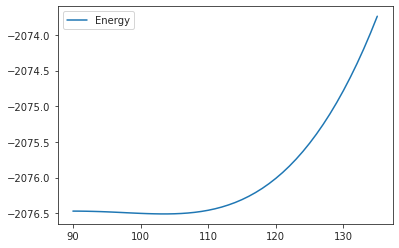

In [38]:
# Plot the dataframe created in the last cell (df.plot())
pes_scan.plot()
print("Figure 7. Energies from 135° to 90°")

In the next cell, I found the minimum value in the PES scan and calculated the difference in energy between the minimum and the local maximum (the energy of the structure at 90 degrees). 

In [39]:
min_energy = np.min(pes_scan)
transition_energy = pes_scan.loc[90].item()
barrier_energy = transition_energy - min_energy

print(f"The minimum energy is {min_energy} eV, which occurs at {pes_scan.idxmin().item()} degrees.")
print(f"The energy of the transition state (at 90 degrees) is {transition_energy} eV.")
print(f"The optimized energy of the planar ion is {planar_mol.properties.data()['energy']['total']} eV.")
print(f"The barrier height is {barrier_energy} eV.")

The minimum energy is Energy   -2076.509501
dtype: float64 eV, which occurs at 104 degrees.
The energy of the transition state (at 90 degrees) is -2076.4700443003935 eV.
The optimized energy of the planar ion is -2076.4708636977834 eV.
The barrier height is Energy    0.039457
dtype: float64 eV.


### The above steps were repeated for MP2 calculations

In [40]:
#Import data from the PES scan. May need to keep in cclib format
MP2logfile = 'Problem_3/PES_scan/MP2method.log'
MP2pes_log = cclib.io.ccread(MP2logfile)

# Display some information about our log file
for key, value in MP2pes_log.metadata.items():
    print(f'{key:18}: {value}')

package           : Gaussian
methods           : ['HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2', 'HF', 'MP2']
success           : True
legacy_package_version: 16revisionB.01
package_version   : 2016+B.01
platform          : ES64L
basis_set         : 6-31G(d,p)
cpu_time          : [datetime.timedelta(seconds=92, microseconds=900000)]
wall_time         : [datetime.timedelta(seconds=23, microseconds=500000)]


In [41]:
# Create a list of angles from first (inclusive) to last (exclusive) by step
scan_angles = np.arange(135,89,-1)

# Create a dataframe containing our data. 
MP2pes_scan = pd.DataFrame(data=MP2pes_log.scanenergies, # data in the collection
                        columns=['Energy'], # column labels, as a list
                        index=scan_angles) # How to index the data (angle list)

print("Table 7. Energies of H₃O⁺ from 135° to 90°")
MP2pes_scan

Table 7. Energies of H₃O⁺ from 135° to 90°


,Energy
135,-2079.363431
134,-2079.579489
133,-2079.781398
132,-2079.970517
131,-2080.147119
...,...
94,-2081.761298
93,-2081.757761
92,-2081.755040
91,-2081.753407


Figure 8. Energies from 135° to 90°


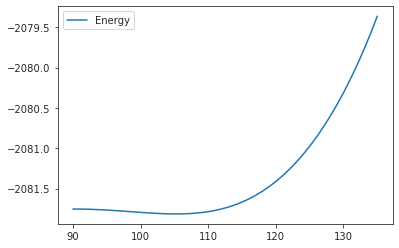

In [42]:
# Plot the dataframe created in the last cell (df.plot())
MP2pes_scan.plot()
print("Figure 8. Energies from 135° to 90°")

In [43]:
MP2min_energy = np.min(MP2pes_scan)
MP2transition_energy = MP2pes_scan.loc[90].item()
MP2barrier_energy = MP2transition_energy - MP2min_energy

print(f"The minimum energy is {MP2min_energy} eV, which occurs at {MP2pes_scan.idxmin().item()} degrees.")
print(f"The energy of the transition state (at 90 degrees) is {MP2transition_energy} eV.")
print(f"The optimized energy of the planar ion is {planar_mol.properties.data()['energy']['total']} eV.")
print(f"The barrier height is {MP2barrier_energy} eV.")

The minimum energy is Energy   -2081.813544
dtype: float64 eV, which occurs at 105 degrees.
The energy of the transition state (at 90 degrees) is -2081.752862594001 eV.
The optimized energy of the planar ion is -2076.4708636977834 eV.
The barrier height is Energy    0.060681
dtype: float64 eV.


Figure 8. Energies from 135° to 90°


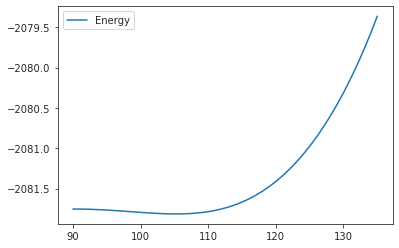

In [44]:
MP2pes_scan.plot()
#pes_scan.plot()

print("Figure 8. Energies from 135° to 90°")

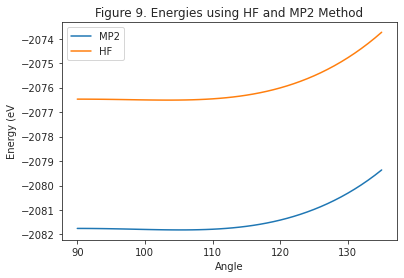

In [45]:
plt.plot(MP2pes_scan, label = "MP2")
plt.plot(pes_scan, label = "HF")
plt.xlabel("Angle")
plt.ylabel("Energy (eV")
plt.title("Figure 9. Energies using HF and MP2 Method")
plt.legend(loc="upper left")
plt.show()

# Discussion

The computed electronic energy of the H atom using Hartree-Fock theory in the STO-3G basis set was 0.454180 Ha, but the exact result is -0.50 Ha. This means the STO-3G basis set in the HF theory does not accurately predict the Hydrogen electronic energy. In the HF theory, the cc-pVQZ basis set converges the best to -0.5 Ha with a computed electronic energy of -0.496306 Ha. In Figure 2, most of the pVQZ converge close to -0.5 Ha, but each line representing a different basis function does not fully converge to -0.5 Ha. The SVWN method has the worst convergence compared to the other two methods as seen in Figure 2.

The bond length of the lowest energy from Table 3 is 0.93 Å with an energy of -100.33 Ha. The experimental bond length that corresponds to the lowest energy is 0.917 Å. The bond length in Table 3 approximates closely to the experimental value. The calculated atomization energy ∆𝐻_at of HF using HF theory is -294.67 kJ/mol. The calculated atomization energy $\Delta H_{at}$ of HF using PBE1PBE theory is -131.18 kJ/mol. The experimental $\Delta H_{at}$ is 135.2 kcal/mol which means the PBE1PBE method approximates close to the experimental results but the HF method is not a good approximation for the experimental results. The dipole equilibrium bond distance corresponds to the lowest energy. The lowest energy of HF has a dipole of 1.8565 debye using the PBE1PBE method, while the lowest energy of HF has a dipole of 1.9947 debye using the HF method. The dipole moment that corresponds to the experimental equilibrium distance is 1.82 debye. The PBE1PBE method closely approximates to the experimental equilibrium dipole moment, but the HF method does not. The dipole moments using the HF method are plotted in Figure 5 and it is predicted that at larger distances, the linear trend will continue. On the other hand, Figure 6 shows the dipole moments plotted from the PBE1PBE method. At larger distances, it is predicted that the linearity will not continue because at the upper part of the line, the trajectory of the line is starting to curve. 

Based on the first $H_3O^+$ model, the fully relaxed structure looks planar. This is not the correct structure of $H_3O^+$ because there should be bending of the bonds causing a tetrahedral model to form due to bond pair repulsion. Based on the interactive planar model, the negative frequency is -581.23 with an intensity of 764.58 with the normal mode number 0. On the other hand, the pyramidal molecule does not have any negative frequencies. The molecular motion of the vibration with normal mode number 0 is out-of-plane wagging. The type of vibration for normal mode number 1 is in-plane scissoring. The type of vibration for normal mode number 2 is in-plane bending. The type of vibration for normal mode number 3 is symmetric stretching vibrations. The type of vibrations for normal mode numbers 4 & 5 are asymmetric stretching vibrations. The vibrations for each natural mode number was the same for the pyramidal molecule. The total energy of the planar molecule was -2076.471 eV, while the total energy of the pyramidal molecule was -2076.510 eV. There was a very small difference of total energy for both types of molecules, but the pyramidal molecule had a lower total energy. In the Potential-Energy Surface Scan, the calculated length of the O-H bond was 0.9612 Angstrom. Using the HF method, the minimum energy was -76.310 Ha which occurs at 104 degrees. The energy of the transition state (at 90 degrees) was -76.309 Ha. The optimized energy of the planar ion is -76.309 Ha. The barrier height was 0.039457. Using the MP2 method, the minimum energy was -76.505 Ha, which occurs at 105 degrees. The energy of the transition state (at 90 degrees) is -76.503 eV. The optimized energy of the planar ion is -76.309 Ha. The barrier height is 0.060681. Based on the Potential-Energy Surface Scan, the minimum energy was lower for the MP2 method and the MP2 calculated barrier height was larger than the HF calculated barrier height. In Figure 9, all the energies of the HF method are larger than the energies of the MP2 method.